 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
#reading whale returns csv 
csv_path = Path(r"c:/users/ana_c/Documents/temp/assignment_3_due_sep_18_2023/pandas/whale_returns.csv")
#csv_path = Path("../assignment_3_due_sep_18_2023/pandas/whale_returns.csv")
whale_returns = pd.read_csv(csv_path)
whale_returns.head()

Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0  2015-03-02                        NaN                 NaN   
1  2015-03-03                  -0.001266           -0.004981   
2  2015-03-04                   0.002230            0.003241   
3  2015-03-05                   0.004016            0.004076   
4  2015-03-06                  -0.007905           -0.003574   

   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                          NaN                     NaN  
1                    -0.000496               -0.006569  
2                    -0.002534                0.004213  
3                     0.002355                0.006726  
4                    -0.008481               -0.013098

In [3]:
#set date as a dataframe index
#whale_returns = whale_returns.set_index("Date")
whale_returns = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
#deprecated code: sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [4]:
# Count nulls by column
whale_returns.isnull().mean()*100
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# remove nulls
whale_returns = whale_returns.dropna()

In [6]:
# verify nulls are removed
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# Sort data by `Date` in ascending order
whale_returns = whale_returns.sort_values("Date", ascending=True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
#reading s&p tsx prices
csv_path = Path(r"c:/users/ana_c/Documents/temp/assignment_3_due_sep_18_2023/pandas/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(csv_path)
sp_tsx_history.head()

Date       Close
0  1-Oct-2012  $12,370.19
1  2-Oct-2012  $12,391.23
2  3-Oct-2012  $12,359.47
3  4-Oct-2012  $12,447.68
4  5-Oct-2012  $12,418.99

In [9]:
#set date as a dataframe index
#sp_tsx_history = sp_tsx_history.set_index("Date")
sp_tsx_history = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [10]:
# Count nulls by column
sp_tsx_history.isnull().mean()*100
sp_tsx_history.isnull().sum()

Close    0
dtype: int64

In [11]:
# Drop nulls
sp_tsx_history = sp_tsx_history.dropna()

In [12]:
sp_tsx_history.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [13]:
# Sort data by `Date` in ascending order
sp_tsx_history = sp_tsx_history.sort_values("Date", ascending=True)
sp_tsx_history.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [14]:
# Determine Data Type of Close price
sp_tsx_history.dtypes

Close    object
dtype: object

In [15]:
#REMOVE $ signs from Close price amounts and convert data type
cols_to_check = ['Date','Close']
print(sp_tsx_history.iloc[[0, 2]])
sp_tsx_history.iloc[[0,2]] = sp_tsx_history.iloc[[0,2]].replace({'$',""}, regex = True)
print(sp_tsx_history)

                 Close
Date                  
2012-10-01  $12,370.19
2012-10-03  $12,359.47
                 Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99
...                ...
2019-12-20  $17,118.44
2019-12-23  $17,128.71
2019-12-24  $17,180.15
2019-12-27  $17,168.21
2019-12-30  $17,098.56

[1818 rows x 1 columns]


In [16]:
#New attempt to REMOVE $ signs from Close price amounts and convert data type
#sp_tsx_history['Close'] = pd.to_numeric(sp_tsx_history['Close'], errors='coerce')
sp_tsx_history['Close'] =sp_tsx_history['Close'].replace('[\$,]','', regex=True).astype(float)
#sp_tsx_history['Close'] =sp_tsx_history['Close'].str.replace("$","")
sp_tsx_history.head()

Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

In [17]:
## Deprecated code
#OR CONVERT object dtype int64
#sp_tsx_history.convert_dtypes
#sp_tsx_history["Close"] = sp_tsx_history["Close"].astype('int64')
#sp_tsx_history
##

In [18]:
# Calculate Daily Returns
sp_tsx_history['Daily_Return'] = sp_tsx_history['Close'].pct_change()
#sp_tsx_history.describe()
print(sp_tsx_history)

               Close  Daily_Return
Date                              
2012-10-01  12370.19           NaN
2012-10-02  12391.23      0.001701
2012-10-03  12359.47     -0.002563
2012-10-04  12447.68      0.007137
2012-10-05  12418.99     -0.002305
...              ...           ...
2019-12-20  17118.44      0.003188
2019-12-23  17128.71      0.000600
2019-12-24  17180.15      0.003003
2019-12-27  17168.21     -0.000695
2019-12-30  17098.56     -0.004057

[1818 rows x 2 columns]


In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history.head()

Close  Daily_Return
Date                              
2012-10-01  12370.19           NaN
2012-10-02  12391.23      0.001701
2012-10-03  12359.47     -0.002563
2012-10-04  12447.68      0.007137
2012-10-05  12418.99     -0.002305

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [20]:
#reading algo returns
csv_path = Path(r"c:/users/ana_c/Documents/temp/assignment_3_due_sep_18_2023/pandas/algo_returns.csv")
algo_returns = pd.read_csv(csv_path)
algo_returns.head()

Date    Algo 1  Algo 2
0  2014-05-28  0.001745     NaN
1  2014-05-29  0.003978     NaN
2  2014-05-30  0.004464     NaN
3  2014-06-02  0.005692     NaN
4  2014-06-03  0.005292     NaN

In [21]:
#set date as a dataframe index
#algo_returns = algo_returns.set_index("Date")
algo_returns = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [29]:
# Sort data by `Date` in ascending order
algo_returns = algo_returns.sort_values("Date", ascending=True)
algo_returns.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

In [30]:
# Count nulls by column
algo_returns.isnull().mean()*100
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [34]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()

In [35]:
# verify nulls are removed
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [36]:
#checking file data types
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [37]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.concat([whale_returns, algo_returns, sp_tsx_history['Daily_Return']], axis='columns', join="inner")
portfolio_df

##Deprecated code
#portfolio_df = pd.concat([whale_returns, algo_returns, sp_tsx_history['Daily_Return']], axis="columns", join="inner")
#portfolio_df.columns = ['Whale_Portfolio', 'Algo_Portfolio', 'SP_TSX_60']
##

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2  Daily_Return  
Date                                
2015-03-03 -0.000949     -0.008530  
2015-03-04  0.002416     -0.003371  
2015-03-05  0.004323      0.001344  
2015-03-06 -0.011460     -0.009972  
2015-03-09  0.001303     -0.006555  
...              ...           ...  
2019-04-25 -0.007247     -0.000628  
2019-04-26  0.005256      0.002254  
2019-04-29  0.002829     -0.000788  
2019-04-30 -0.001570     -0.001183  
2019-05-01 -0.007358     -0.004703  

[1029 rows x 7 columns]

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily_Return'}, xlabel='Date'>

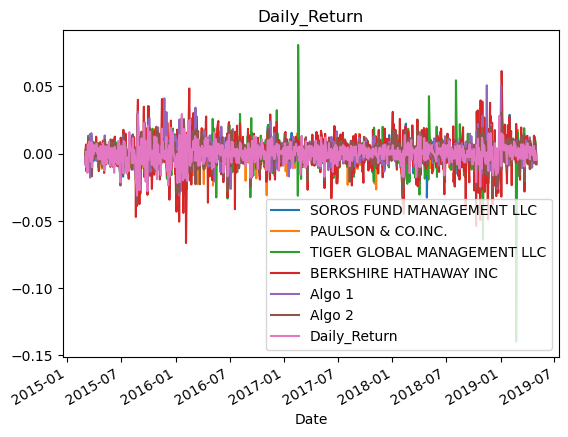

In [38]:
# Plot daily returns of all portfolios
portfolio_df.plot(title='Daily_Return')

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

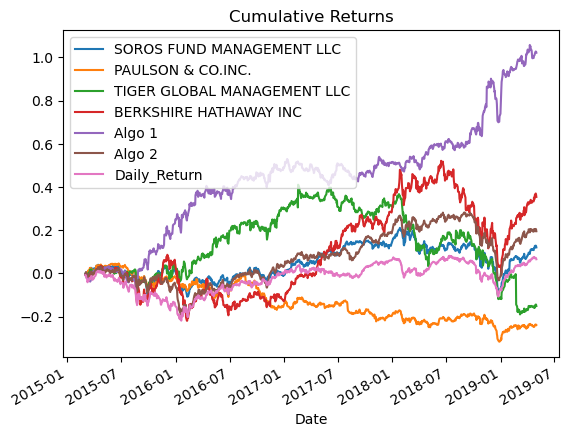

In [39]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+portfolio_df).cumprod()-1
# Plot cumulative returns
cumulative_returns.plot(title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

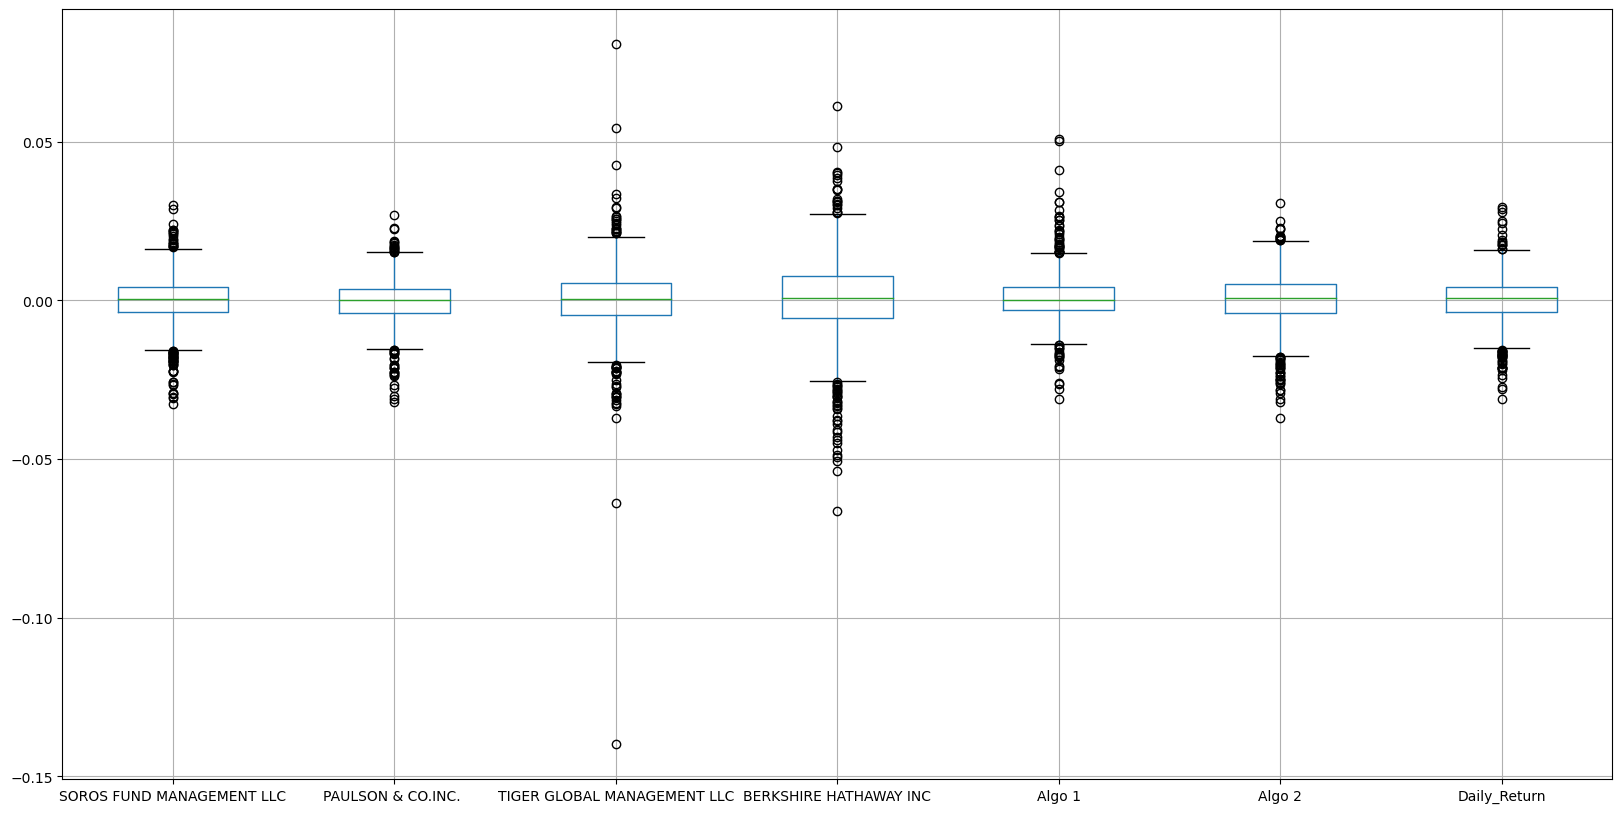

In [40]:
# Box plot to visually show risk, adding fig size
portfolio_df.boxplot(figsize =(20,10)) 

### Calculate Standard Deviations

In [41]:
# Calculate the daily standard deviations of all portfolios
std_dev = portfolio_df.std()
std_dev

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
Daily_Return                   0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [42]:
# Calculate  the daily standard deviation of S&P TSX 60
std_dev = sp_tsx_history['Daily_Return'].std()
std_dev
# Determine which portfolios are riskier than the S&P TSX 60


0.006637362556692504

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = std_dev*np.sqrt(252) 
annualized_std

0.10536486411828129

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

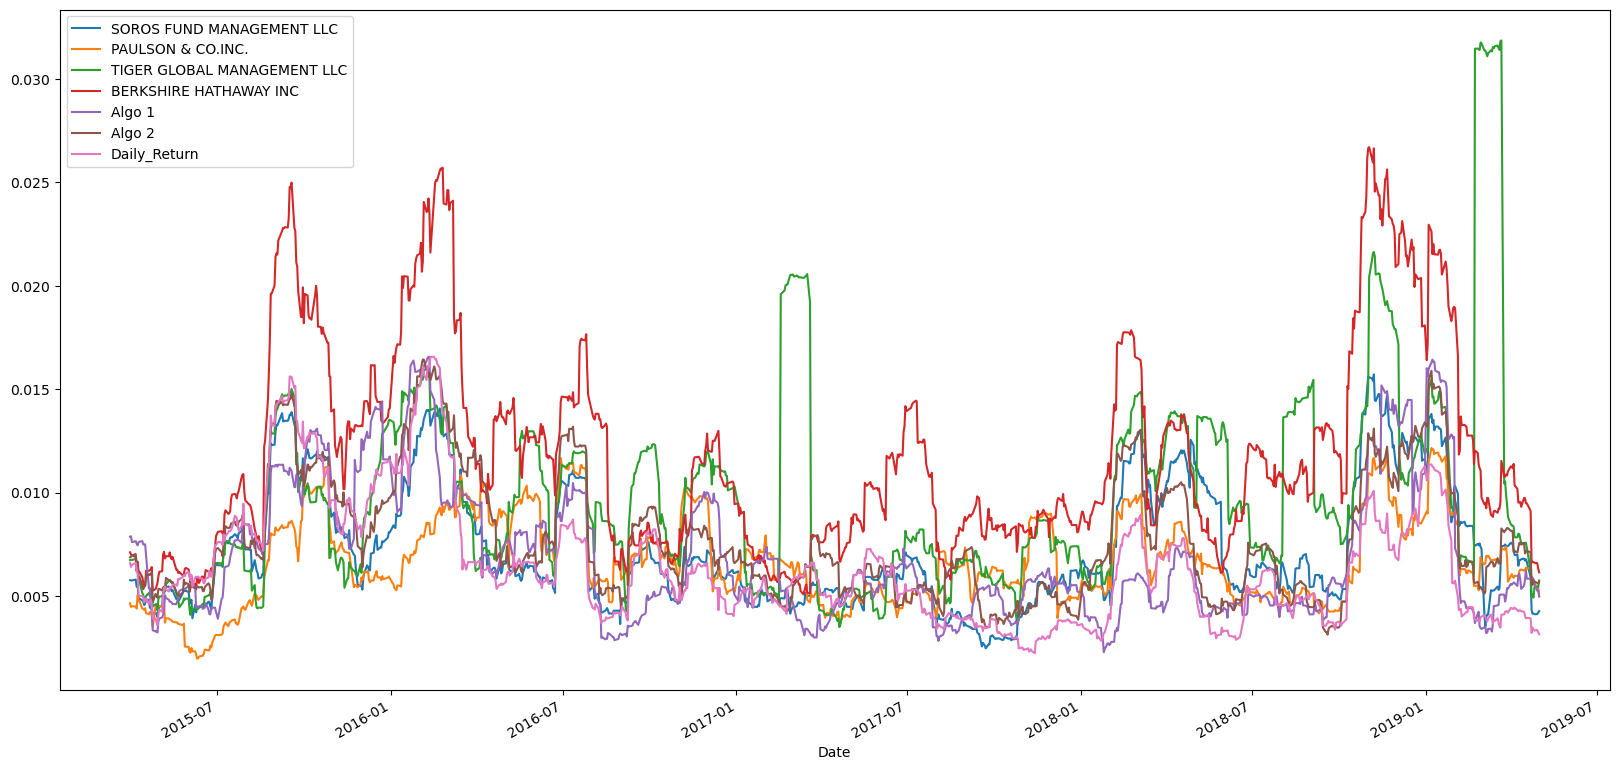

In [44]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
portfolio_df.rolling(window=21).std().plot(figsize =(20,10))


### Calculate and plot the correlation

<Axes: >

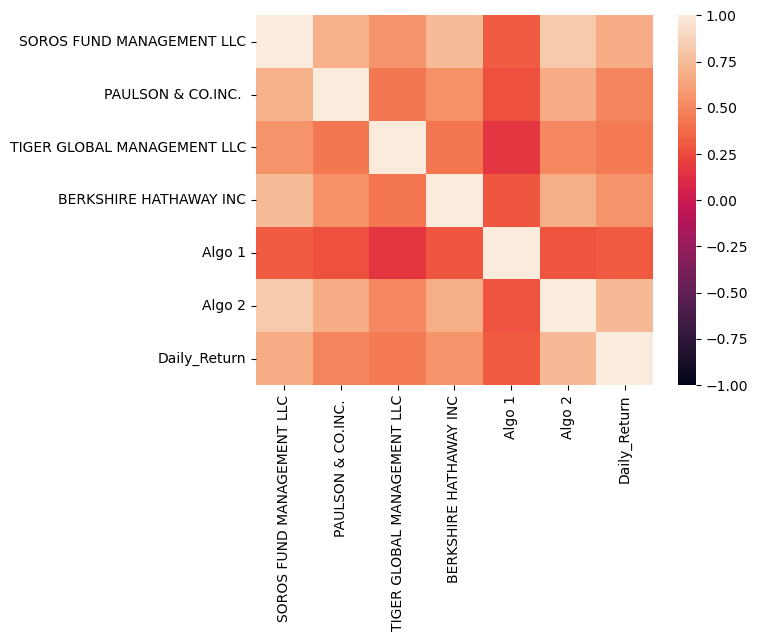

In [45]:
# Calculate the correlation
correlation_matrix = portfolio_df.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1)
#correlation_matrix

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [46]:
# Calculate variance of S&P TSX
variance = sp_tsx_history['Daily_Return'].var()
# Diplay S&P 60 TSX variance
print(f"S&P 60 TSX variance is: {variance}")

S&P 60 TSX variance is: 4.405458170898365e-05


In [47]:
# Calculate covariance of a SINGLE portfolio; Algo 2 vs S&P TSX 60

#covariance = sp_tsx_history['Daily_Return'].cov(algo_returns["Algo 1"])
covariance = algo_returns["Algo 2"].cov(sp_tsx_history['Daily_Return'])
print(f"Algo 2 covariance is: {covariance}")

# Computing beta
Algo_beta = covariance/variance 
#portfolio_df['Whale_Portfolio'].rolling(window=60).cov(portfolio_df['SP_TSX_60']) / portfolio_df['SP_TSX_60'].rolling(window=60).var()
print(f"Algo 2 beta is: {Algo_beta}")

Algo 2 covariance is: 4.284786214739706e-05
Algo 2 beta is: 0.9726085343504574


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [96]:
# Use `ewm` to calculate the rolling window
portfolio_df.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=1, times=None, method='single')

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=1,method=single]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Annualized Sharpe Ratios
sharpe_ratios = ((portfolio_df.mean()-portfolio_df['Daily_Return'].mean()) * 252) / (portfolio_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
Daily_Return                   0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

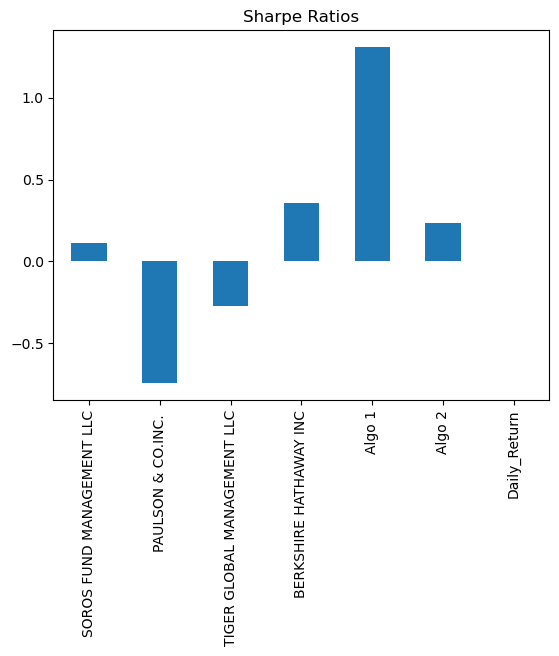

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [98]:
# Reading data from 2nd stock - vsp.csv
csv_path = Path(r"c:/users/ana_c/Documents/temp/assignment_3_due_sep_18_2023/pandas/vsp_daily_price.csv")
# Reset Date index
vsp_daily_price = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
vsp_daily_price = vsp_daily_price.rename(columns={"Close":"VSP Close Price"})
vsp_daily_price.head()

VSP Close Price
Date                                
2022-09-13 16:00:00            65.61
2022-09-14 16:00:00            65.84
2022-09-15 16:00:00            65.13
2022-09-16 16:00:00            64.55
2022-09-19 16:00:00            65.00

In [99]:
# Reading data from 3rd stock - voog.csv
csv_path = Path(r"c:/users/ana_c/Documents/temp/assignment_3_due_sep_18_2023/pandas/voog_daily_price.csv")
voog_daily_price = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
voog_daily_price = voog_daily_price.rename(columns={"Close":"VOOG Close Price"})
voog_daily_price.head()

VOOG Close Price
Date                                 
2022-09-13 16:00:00            229.84
2022-09-14 16:00:00            231.00
2022-09-15 16:00:00            227.40
2022-09-16 16:00:00            225.71
2022-09-19 16:00:00            227.49

In [112]:
# Reading data from 1st stock - amzn.csv 
csv_path = Path(r"c:/users/ana_c/Documents/temp/assignment_3_due_sep_18_2023/pandas/amzn_daily_price.csv")
# Reset Date index
amzn_daily_price = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
#remove hour from timestamp
##amzn_daily_price["new_date"]=amzn_daily_price["Date"].dt.date
amzn_daily_price = amzn_daily_price.rename(columns={"Close":"Amazon Close Price"})
amzn_daily_price.head()

Amazon Close Price
Date                                   
2022-09-13 16:00:00              126.82
2022-09-14 16:00:00              128.55
2022-09-15 16:00:00              126.28
2022-09-16 16:00:00              123.53
2022-09-19 16:00:00              124.66

In [101]:
# Combine all stocks in a single DataFrame
#my_portfolio_df = pd.concat([voog_daily_price, vsp_daily_price, amzn_daily_price], axis='columns', join="inner")
my_portfolio_df = pd.concat([vsp_daily_price, voog_daily_price, amzn_daily_price], axis='columns', join="inner")
my_portfolio_df

VSP Close Price  VOOG Close Price  Amazon Close Price
Date                                                                      
2022-09-13 16:00:00            65.61            229.84              126.82
2022-09-14 16:00:00            65.84            231.00              128.55
2022-09-15 16:00:00            65.13            227.40              126.28
2022-09-16 16:00:00            64.55            225.71              123.53
2022-09-19 16:00:00            65.00            227.49              124.66
...                              ...               ...                 ...
2023-09-06 16:00:00            73.42            257.47              135.36
2023-09-07 16:00:00            73.17            256.47              137.85
2023-09-08 16:00:00            73.26            256.84              138.23
2023-09-11 16:00:00            73.77            258.60              143.10
2023-09-12 16:00:00            73.36            256.50              141.23

[245 rows x 3 columns]

In [102]:
# Reset Date index
## Done for individual stocks, is it needed for portfolio??

In [103]:
# Reorganize portfolio data by having a column per symbol
## DONE ABOVE

In [104]:
# Calculate daily returns
my_portfolio_df = my_portfolio_df.pct_change()
my_portfolio_df.head()
# Drop NAs
# Display sample data

VSP Close Price  VOOG Close Price  Amazon Close Price
Date                                                                      
2022-09-13 16:00:00              NaN               NaN                 NaN
2022-09-14 16:00:00         0.003506          0.005047            0.013641
2022-09-15 16:00:00        -0.010784         -0.015584           -0.017658
2022-09-16 16:00:00        -0.008905         -0.007432           -0.021777
2022-09-19 16:00:00         0.006971          0.007886            0.009148

In [105]:
my_portfolio_df.isnull().mean()*100
my_portfolio_df.isnull().sum()

VSP Close Price       1
VOOG Close Price      1
Amazon Close Price    1
dtype: int64

In [113]:
############## added inplace=True to fix issue that caused the Close price rows to turn into NaN every time the code was executed 
my_portfolio_df.dropna(inplace=True)

In [114]:
my_portfolio_df.isnull().sum()

VSP Close Price       0
VOOG Close Price      0
Amazon Close Price    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [51]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [52]:
# Join your returns DataFrame to the original returns DataFrame


In [53]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [97]:
# Calculate the annualized `std`
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

NameError: name 'daily_std' is not defined

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!